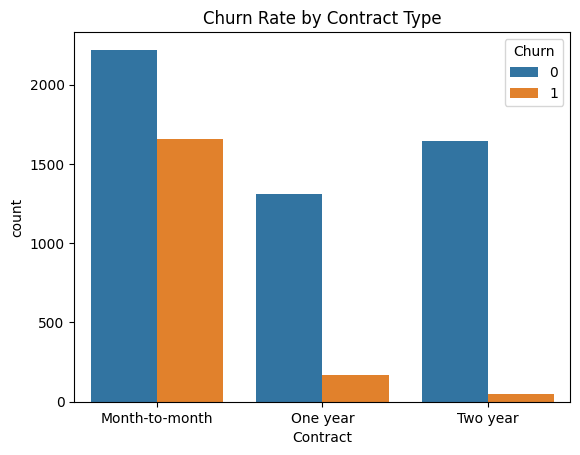

In [4]:
#Importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Telco Churn CSV
df = pd.read_csv('../data/telco_churn.csv')

#Converting "Yes" and "No" into binary 1/0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

#Testing: Churn by contract type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import joblib

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('Churn', axis = 1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

joblib.dump(model, '../models/churn_model.pkl')

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409

